# 確率分布の性質

## 再生性

確率変数の和が同じ確率分布になることを再生性という。

例えば、$N(\mu_1, \sigma_1^2)$の正規分布に従う確率変数と$N(\mu_2, \sigma_2^2)$の正規分布に従う確率変数の和は、$N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$の正規分布に従う。

:::{note}

「再生性を持っていたとしても（例えば正規分布でも）、2つの分布を足したら2つの峰の分布になるのではないか？」と思われるかもしれない。

例えば、1つ目の分布から得た$n$個のサンプル$(x_1, x_2, \dots, x_n)$があり、もう1つの分布からも同様に$n$個のサンプル$(y_1, y_2, \dots, y_n)$が得られているとする。

仮にサンプルを連結するように足す、すなわち

$$
(x_1, x_2, \dots, x_n, y_1, y_2, \dots, y_n)
$$

という$2n$個のサンプルを作る場合、これは2つの峰の分布となる。

しかし、再生性で議論しているのは

$$
\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}
+
\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{pmatrix}
$$

という演算である
:::

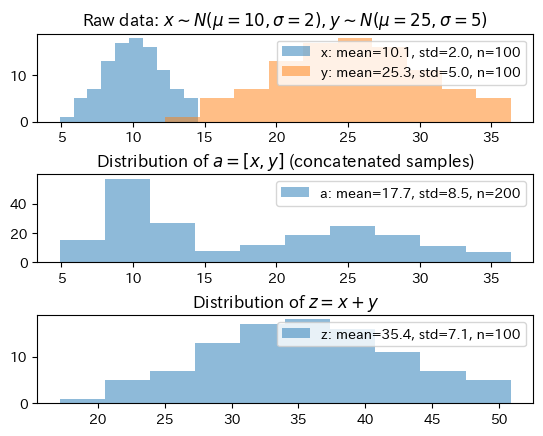

In [51]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import norm

x = norm.rvs(loc=10, scale=2, size=100, random_state=0)
y = norm.rvs(loc=25, scale=5, size=100, random_state=0)

def info(x):
    return f"mean={x.mean():.1f}, std={x.std():.1f}, n={len(x)}"
    

fig, axes = plt.subplots(nrows=3)
fig.subplots_adjust(hspace=0.6)
axes[0].hist(x, label=f"x: {info(x)}", alpha=.5)
axes[0].hist(y, label=f"y: {info(y)}", alpha=.5)
axes[0].set(title=r"Raw data: $x \sim N(\mu=10, \sigma=2), y \sim N(\mu=25, \sigma=5)$")
axes[0].legend()


# もしレコードを結合するなら、２峰の分布になる
import numpy as np
a = np.append(x, y)
axes[1].hist(a, label=f"a: {info(a)}", alpha=.5)
axes[1].legend()
axes[1].set(title=f"Distribution of $a = [x, y]$ (concatenated samples)")


# レコードを結合するのではなく、サンプルごとに和をとっている点に注意
z = x + y
axes[2].hist(z, label=f"z: {info(z)}", alpha=.5)
axes[2].legend()
axes[2].set(title=f"Distribution of $z = x + y$")

fig.show()

